In [18]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode
import geopandas as gpd
from shapely.geometry import Point
import plotly.express as px

data = pd.read_csv('/Data/data_binaires_tout.csv', delimiter=';')

# **Cluster Soja X Pesticide X Santé**

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



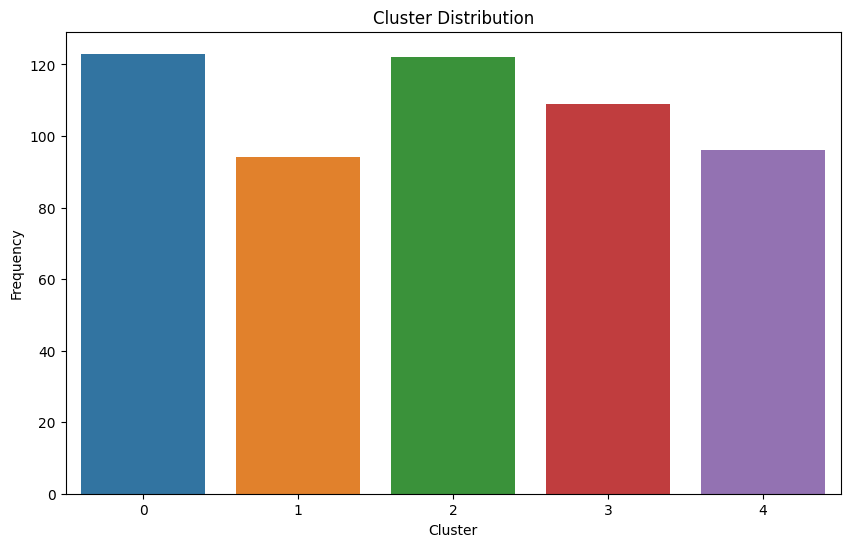

Cluster 0:
[4, 5, 7, 18, 19, 24, 26, 29, 31, 35, 42, 43, 47, 82, 91, 97, 102, 104, 109, 135, 136, 141, 148, 152, 156, 157, 171, 172, 182, 183, 189, 190, 191, 196, 203, 207, 208, 209, 210, 211, 212, 213, 216, 222, 224, 233, 247, 248, 253, 254, 259, 260, 264, 272, 289, 296, 297, 299, 300, 301, 304, 309, 310, 313, 318, 324, 325, 326, 328, 330, 331, 332, 334, 336, 337, 338, 339, 340, 341, 342, 343, 346, 349, 355, 369, 371, 372, 373, 382, 384, 396, 403, 404, 409, 411, 418, 419, 420, 426, 427, 429, 435, 446, 450, 454, 460, 468, 470, 480, 485, 487, 504, 505, 513, 514, 515, 517, 519, 520, 523, 528, 537, 542]


Cluster 1:
[0, 1, 6, 14, 17, 22, 23, 25, 27, 34, 36, 41, 49, 52, 62, 63, 65, 66, 68, 70, 71, 72, 73, 74, 75, 76, 78, 79, 80, 81, 87, 112, 117, 133, 140, 150, 159, 160, 162, 165, 197, 201, 206, 214, 221, 227, 243, 246, 249, 250, 251, 271, 275, 277, 279, 290, 293, 294, 298, 329, 335, 344, 347, 352, 357, 393, 394, 399, 400, 412, 414, 421, 430, 436, 447, 453, 455, 456, 457, 458, 459, 462, 46

In [19]:
columns_needed = data.columns[[0] + list(range(1, 198))]
cluster_data = data[columns_needed].fillna(0)

X = cluster_data.iloc[:, 1:]

# clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X)

cluster_data['Cluster'] = clusters

plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', data=cluster_data)
plt.title('Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.show()


clusters_identifiers = cluster_data.groupby('Cluster')[cluster_data.columns[0]].apply(list)

for cluster, ids in clusters_identifiers.items():
    print(f"Cluster {cluster}:")
    print(ids)
    print("\n")
    



/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

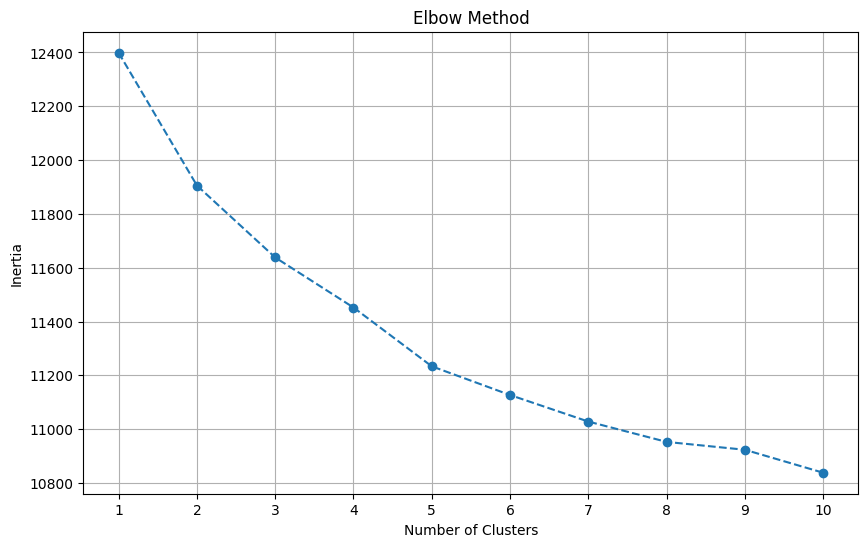

In [20]:
inertia = []

# Teste différentes valeurs de k (nombre de cluster) et calcule la variation intra-cluster pour chaque k
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


In [21]:
# Fonction pour trouver le mode (la valeur la plus fréquente) pour chaque variable numérique dans un cluster
def find_common_features(group):
    modes = group.mode().iloc[0] 
    return modes

# Groupe le DataFrame par cluster et applique la fonction pour trouver les caractéristiques communes
common_features_by_cluster = cluster_data.groupby('Cluster').apply(find_common_features)

# Affichage des identifiants et des caractéristiques communes pour chaque cluster
for cluster in common_features_by_cluster.index:
    print(f"Cluster {cluster}:")
    ids = cluster_data[cluster_data['Cluster'] == cluster][cluster_data.columns[0]].tolist()
    print("Identifiants:", ids)
    
    print("Caractéristiques communes:")
    print(common_features_by_cluster.loc[cluster][1:])
    print("\n")
    
cluster_data = []

# Parcoure chaque cluster pour collecter les caractéristiques communes
for cluster in common_features_by_cluster.index:
    cluster_features = common_features_by_cluster.loc[cluster][1:]
    cluster_data.append(cluster_features.tolist())

df_for_heatmap = pd.DataFrame(cluster_data, index=[f'Cluster {i}' for i in range(len(cluster_data))])

# Transposer le DataFrame pour que les colonnes soient les clusters et les lignes les questions
df_for_heatmap = df_for_heatmap.transpose()

# Maintenant, df_for_heatmap est dans le format où chaque ligne est une question et chaque colonne un cluster

df_for_heatmap = df_for_heatmap.astype(float)

fig = px.imshow(df_for_heatmap,
                labels=dict(x="Clusters", y="Questions", color="Mode"),
                x=[f'Cluster {i}' for i in range(df_for_heatmap.shape[1])],
                y=df_for_heatmap.index,
                aspect="auto")

fig.update_layout(title_text='Heatmap des Mode par Cluster', title_x=0.5)

fig.show()



Cluster 0:
Identifiants: [4, 5, 7, 18, 19, 24, 26, 29, 31, 35, 42, 43, 47, 82, 91, 97, 102, 104, 109, 135, 136, 141, 148, 152, 156, 157, 171, 172, 182, 183, 189, 190, 191, 196, 203, 207, 208, 209, 210, 211, 212, 213, 216, 222, 224, 233, 247, 248, 253, 254, 259, 260, 264, 272, 289, 296, 297, 299, 300, 301, 304, 309, 310, 313, 318, 324, 325, 326, 328, 330, 331, 332, 334, 336, 337, 338, 339, 340, 341, 342, 343, 346, 349, 355, 369, 371, 372, 373, 382, 384, 396, 403, 404, 409, 411, 418, 419, 420, 426, 427, 429, 435, 446, 450, 454, 460, 468, 470, 480, 485, 487, 504, 505, 513, 514, 515, 517, 519, 520, 523, 528, 537, 542]
Caractéristiques communes:
0
Q_4.5.1_revenu_travail_exterieur_Jusqu'a un salaire minimum                        0.0
Q_4.5.1_revenu_travail_exterieur_Personne ne travaille en dehors du lotissement    1.0
Q_4.5.1_revenu_travail_exterieur_Plus de 1 a 3 salaires minimums                   0.0
Q_4.5.1_revenu_travail_exterieur_Plus de 3 a 5 salaires minimums                   0.0
Q

/tmp/ipykernel_416/3873422502.py:7: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [22]:
questions_mode_1_by_cluster = {}

for cluster in common_features_by_cluster.index:
    questions_with_mode_1 = common_features_by_cluster.loc[cluster][common_features_by_cluster.loc[cluster] == 1]
    
    questions_mode_1_by_cluster[f'Cluster {cluster}'] = questions_with_mode_1.index.tolist()

for cluster, questions in questions_mode_1_by_cluster.items():
    print(f"{cluster} a comme questions avec un mode de 1 :")
    for question in questions:
        print(f"- {question}")
    print("\n")


Cluster 0 a comme questions avec un mode de 1 :
- Q_4.5.1_revenu_travail_exterieur_Personne ne travaille en dehors du lotissement
- Q_6.1.4.2_Insecticides_chimiques_Jamais
- Q_6.1.4.2_defensifs_naturels_Jamais
- Q_6.1.4.3_herbicide_Jamais
- Q_9.6.1_situation_communaute_education_bon
- Q_9.6.1_situation_communaute_liens_sociaux_bon
- Q_9.6.1_situation_communaute_relations_autres_acteurs_dont_soja_bon
- Q_9.6.2_changements_15ans_sante_Amelioree
- Q_9.6.2_changements_15ans_education_Amelioree
- Q_9.6.2_changements_15ans_transport_route_Amelioree
- Q_9.6.2_changements_15ans_liens_sociaux_C'est la meme chose
- Q_9.6.2_changements_15ans_acteurs_exterieurs_C'est la meme chose
- Q_9.6.3_situation_communaute_si_continue_Il se renforcera
- Q_3.4.2_activites_agricoles
- Q_9.3.1_Changements_climatiques_augmentation_des_temperatures_chaudes
- Q_9.4.1.4_Les_soja_apportent-ils_des_ameliorations_0
- Q_9.4.1.5_soja_n'a_pas_porte_de_dommage
- Q_9.4.2.4_Probleme_de_sante_pulverisations_0_humaines
- Q_9.5

In [24]:
# Convertir le DataFrame en JSON
heatmap_json = df_for_heatmap.reset_index().to_json(orient='records')

# Enregistrer le JSON dans un fichier (optionnel)
with open('/kaggle/working/heatmap_data.json', 'w') as f:
    f.write(heatmap_json)
